Survival &emsp;Survival	0 = No, 1 = Yes <br>
Pclass	&emsp;Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd <br>
Sex	  &emsp;Sex	<br>
Age	&emsp;Age in years	
Sibsp	&emsp;# of siblings / spouses aboard the Titanic	<br>
Parch	&emsp;# of parents / children aboard the Titanic	<br>
Ticket	&emsp;Ticket number	<br>
Fare	&emsp;Passenger fare	<br>
Cabin	&emsp;Cabin number	<br>
Embarked &emsp;Port of Embarkation

In [774]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from xgboost import XGBClassifier

In [775]:
df = pd.read_csv('train.csv')

In [776]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [777]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [778]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [779]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

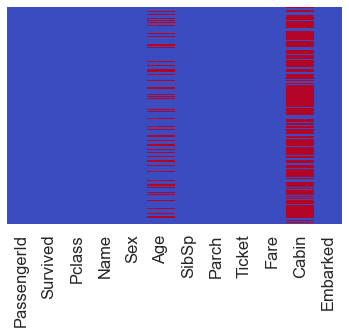

In [780]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')

In [781]:
df.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [782]:
df=df.reset_index(drop=True)

In [783]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [784]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### Embarked

In [785]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

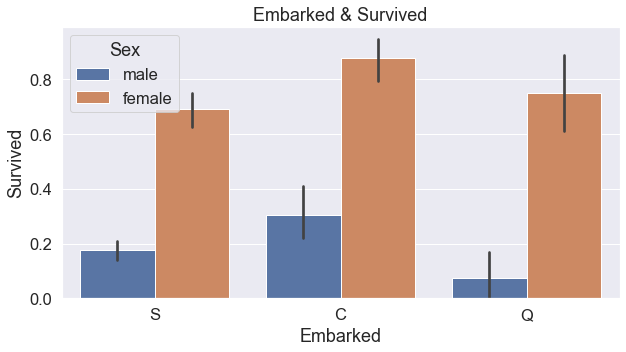

In [786]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
plt.title("Embarked & Survived")
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=df)
plt.show()

In [787]:
df[df['Embarked'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [788]:
df["Embarked"].fillna("S", inplace=True)

In [789]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [790]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

### Name str

In [791]:
df.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().value_counts()

df['Name_str'] = df.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Royal', 'Don': 'Royal', 'Jonkheer': 'Royal', 'the Countess': 'Royal', 'Sir': 'Royal', 'Mme': 'Royal', 'Capt': 'Mr', 'Major': 'Mr', 'Col': 'Mr', 'Rev': 'Mr', 'Dr': 'Mr'})

df["Name_str"].value_counts()

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


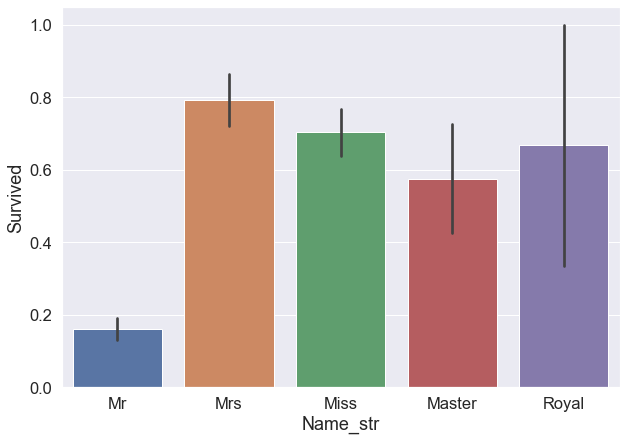

In [792]:
plt.figure(figsize=(10,7))
sns.barplot(x="Name_str", y="Survived", data=df)
plt.show()

### Age

In [793]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Name_str        object
dtype: object

In [794]:
df.groupby('Name_str')['Age'].mean()

Name_str
Master     4.574167
Miss      21.845638
Mr        32.955422
Mrs       35.898148
Royal     38.666667
Name: Age, dtype: float64

In [795]:
df[(df["Age"].isna()) & (df['Name_str']=='Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,7.8958,S,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,C,Mr
...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,29.7000,C,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.5500,S,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S,Mr


In [796]:
df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Mr')] = 33

<ipython-input-796-65e1de6c3c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Mr')] = 33


In [797]:
df[(df["Age"].isna()) & (df['Name_str']=='Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,7.7500,Q,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,7.7875,Q,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,24.1500,Q,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,22.3583,C,Miss
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.5500,S,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,7.7500,Q,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,25.4667,S,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,7.5500,S,Miss


In [798]:
df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Miss')] = 21

<ipython-input-798-9c46185dc37b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Miss')] = 21


In [799]:
df[(df["Age"].isna()) & (df['Name_str']=='Master')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,15.2458,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.5500,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,25.4667,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,15.2458,C,Master


In [800]:
df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Master')] = 5

<ipython-input-800-779f32de41f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Master')] = 5


In [801]:
df[(df["Age"].isna()) & (df['Name_str']=='Mrs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C,Mrs
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,C,Mrs
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,15.2458,C,Mrs
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,55.0000,S,Mrs
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,15.5000,Q,Mrs
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,79.2000,C,Mrs
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,133.6500,S,Mrs
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,16.1000,S,Mrs
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,7.2292,C,Mrs
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,82.1708,C,Mrs


In [802]:
df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Mrs')] = 36

<ipython-input-802-265294cd32cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[(df["Age"].isna()) & (df['Name_str']=='Mrs')] = 36


In [803]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Name_str       0
dtype: int64

In [804]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [805]:
df['Age']=[math.ceil(df['Age'].iloc[i])for i in list(df.index)]

In [806]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.813692,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.306713,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [807]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Name_str        object
dtype: object

## Sex
Female 0
Male 1

In [808]:
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)

In [809]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

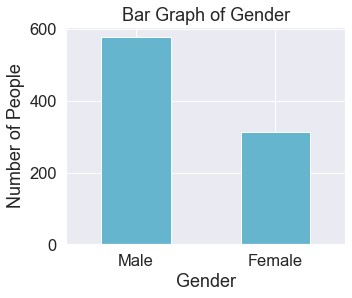

In [810]:
gender = df['Sex'].value_counts()
plt.figure(figsize=(5, 4))
ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))
plt.show()

In [811]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Name_str        object
dtype: object

In [812]:
women=df.loc[df['Sex'] == 0]['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [813]:
men=df.loc[df['Sex'] == 1]['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [814]:
p =[]
p =[rate_women,rate_men]
l=['Female','Male']

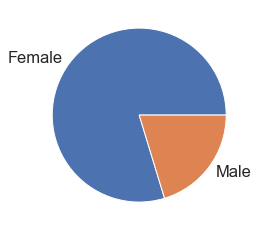

In [815]:
plt.pie(p,labels=l)
plt.show()

### I still have three non numeric columns <br>

### Embarked

In [816]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot: xlabel='Embarked', ylabel='count'>

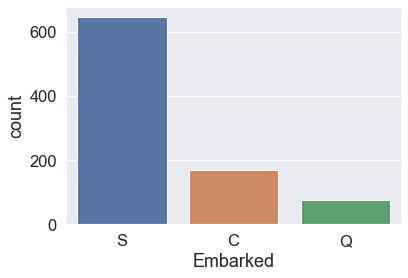

In [817]:
sns.countplot(x="Embarked", data=df)

In [818]:
em = {'S':0, 'C':1, 'Q':2}
df['Embarked']=df['Embarked'].map(em)

In [819]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,Mr


In [820]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Name_str        object
dtype: object

### Name_str

In [821]:
df['Name_str'].value_counts()

Mr        535
Miss      185
Mrs       125
Master     40
Royal       6
Name: Name_str, dtype: int64

In [822]:
df[(df["Name_str"]=='Royal')] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
30,31,0,1,"Uruchurtu, Don. Manuel E",1,40,0,0,27.7208,1,Royal
369,370,1,1,"Aubart, Mme. Leontine Pauline",0,24,0,0,69.3000,1,Royal
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",0,48,1,0,39.6000,1,Royal
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,49,1,0,56.9292,1,Royal
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33,0,0,86.5000,0,Royal
822,823,0,1,"Reuchlin, Jonkheer. John George",1,38,0,0,0.0000,0,Royal


In [823]:
# df['Name_str'] = df['Name_str'].replace('Uncommon', 'Royal')

In [824]:
namere = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Royal':4}
df['Name_str']=df['Name_str'].map(namere)

In [825]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,0


In [826]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Name_str         int64
dtype: object

### Name

In [827]:
df.drop('Name',axis=1,inplace=True)

In [828]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Name_str         int64
dtype: object

### Fare from float to int using ceiling

In [829]:
df['Fare']=[math.ceil(df['Fare'].iloc[i])for i in list(df.index)]

In [830]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Embarked       int64
Name_str       int64
dtype: object

In [831]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
0,1,0,3,1,22,1,0,8,0,0
1,2,1,1,0,38,1,0,72,1,2
2,3,1,3,0,26,0,0,8,0,1
3,4,1,1,0,35,1,0,54,0,2
4,5,0,3,1,35,0,0,9,0,0


In [832]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.042065,-0.057527,-0.001652,0.012435,-0.030467,-0.029998
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.093061,-0.035322,0.081629,0.256800,0.106811,0.475185
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.340629,0.083081,0.018443,-0.548287,0.045702,-0.106854
Sex,0.042939,-0.543351,0.131900,1.000000,0.124628,-0.114631,-0.245489,-0.181958,-0.116569,-0.616097
Age,0.042065,-0.093061,-0.340629,0.124628,1.000000,-0.269161,-0.198369,0.088926,-0.018199,-0.253700
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.269161,1.000000,0.414838,0.159730,-0.059961,0.313464
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.198369,0.414838,1.000000,0.216424,-0.078665,0.379035
Fare,0.012435,0.256800,-0.548287,-0.181958,0.088926,0.159730,0.216424,1.000000,0.062780,0.146768
Embarked,-0.030467,0.106811,0.045702,-0.116569,-0.018199,-0.059961,-0.078665,0.062780,1.000000,0.049109
Name_str,-0.029998,0.475185,-0.106854,-0.616097,-0.253700,0.313464,0.379035,0.146768,0.049109,1.000000


In [833]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.813692,0.523008,0.381594,32.604938,0.361392,0.649832
std,257.353842,0.486592,0.836071,0.477990,13.306713,1.102743,0.806057,49.699083,0.635673,0.926966
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,8.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,15.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,513.000000,2.000000,4.000000


In [834]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
179,180,0,3,1,36,0,0,0,0,0
263,264,0,1,1,40,0,0,0,0,0
271,272,1,3,1,25,0,0,0,0,0
277,278,0,2,1,33,0,0,0,0,0
302,303,0,3,1,19,0,0,0,0,0
413,414,0,2,1,33,0,0,0,0,0
466,467,0,2,1,33,0,0,0,0,0
481,482,0,2,1,33,0,0,0,0,0
597,598,0,3,1,49,0,0,0,0,0
633,634,0,1,1,33,0,0,0,0,0


In [835]:
# one out of 15 people who didnt pay for the fare lived

## Outliers

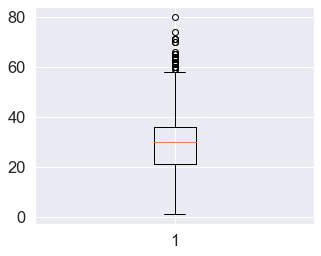

In [836]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['Age'])
plt.show()

In [837]:
df[df['Age'] >= 60]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
33,34,0,2,1,66,0,0,11,0,0
54,55,0,1,1,65,0,1,62,1,0
96,97,0,1,1,71,0,0,35,1,0
116,117,0,3,1,71,0,0,8,2,0
170,171,0,1,1,61,0,0,34,0,0
252,253,0,1,1,62,0,0,27,0,0
275,276,1,1,0,63,1,0,78,0,1
280,281,0,3,1,65,0,0,8,2,0
326,327,0,3,1,61,0,0,7,0,0
366,367,1,1,0,60,1,0,76,1,2


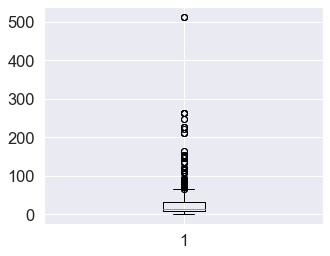

In [838]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['Fare'])
plt.show()

In [839]:
df['Fare'].max()

513

In [840]:
df[df['Fare']==513]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
258,259,1,1,0,35,0,0,513,1,1
679,680,1,1,1,36,0,1,513,1,0
737,738,1,1,1,35,0,0,513,1,0


In [841]:
df.sort_values(by='Fare',ascending=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
679,680,1,1,1,36,0,1,513,1,0
258,259,1,1,0,35,0,0,513,1,1
737,738,1,1,1,35,0,0,513,1,0
742,743,1,1,0,21,2,2,263,1,1
311,312,1,1,0,18,2,2,263,1,1
...,...,...,...,...,...,...,...,...,...,...
822,823,0,1,1,38,0,0,0,0,4
466,467,0,2,1,33,0,0,0,0,0
271,272,1,3,1,25,0,0,0,0,0
277,278,0,2,1,33,0,0,0,0,0


In [842]:
df["Fare"].replace(513,263,inplace=True)

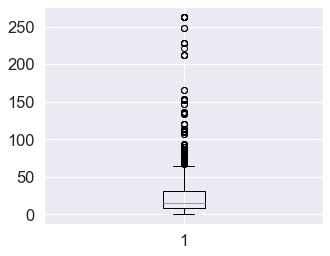

In [843]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['Fare'])
plt.show()

In [844]:
(df['Fare'] >= 160).value_counts()

False    869
True      22
Name: Fare, dtype: int64

In [845]:
df[df['Fare']>=160]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_str
27,28,0,1,1,19,3,2,263,0,0
88,89,1,1,0,23,3,2,263,0,1
118,119,0,1,1,24,0,1,248,1,0
258,259,1,1,0,35,0,0,263,1,1
299,300,1,1,0,50,0,1,248,1,2
311,312,1,1,0,18,2,2,263,1,1
318,319,1,1,0,31,0,2,165,0,1
341,342,1,1,0,24,3,2,263,0,1
377,378,0,1,1,27,0,2,212,1,0
380,381,1,1,0,42,0,0,228,1,1


In [846]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    81.064815
2    20.875000
3    14.154786
Name: Fare, dtype: float64

In [847]:
df['Fare'].loc[df['Fare']>=160] = 81

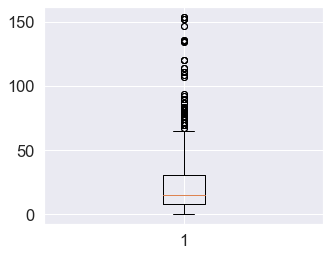

In [848]:
plt.figure(figsize=(5, 4))
plt.boxplot(df['Fare'])
plt.show()

In [849]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Embarked       int64
Name_str       int64
dtype: object

In [850]:
df.drop(['PassengerId','Name_str'],axis=1,inplace=True)

## SMOTE

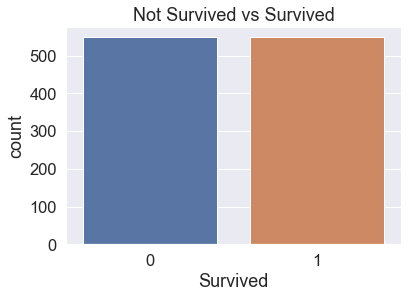

In [851]:
X = df.loc[:,df.columns != 'Survived']
y = df.loc[:,df.columns == 'Survived']


from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

smt = SMOTE(random_state=0)
data_X,data_y=smt.fit_resample(X, y)

sns.countplot(x='Survived',data=data_y)
plt.title('Not Survived vs Survived')
plt.show()

In [852]:
data_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,8,0
1,1,0,38,1,0,72,1
2,3,0,26,0,0,8,0
3,1,0,35,1,0,54,0
4,3,1,35,0,0,9,0
...,...,...,...,...,...,...,...
1093,1,0,36,1,1,126,0
1094,3,1,6,1,1,16,0
1095,3,0,4,1,1,18,0
1096,3,1,32,0,0,8,0


In [853]:
data_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1093,1
1094,1
1095,1
1096,1


## Test data

In [854]:
dftest = pd.read_csv('test.csv')

In [855]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [856]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [857]:
dftest.drop('Cabin',axis=1,inplace=True)

In [858]:
dftest.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [859]:
dftest[dftest['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [860]:
dftest.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [861]:
dftest['Fare'].loc[(dftest['Pclass']==3) &(dftest['Fare'].isna())] = 12

<ipython-input-861-cb6f6abc676e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Fare'].loc[(dftest['Pclass']==3) &(dftest['Fare'].isna())] = 12


In [862]:
dftest.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().value_counts()

dftest['Name_str'] = dftest.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Royal', 'Don': 'Royal', 'Jonkheer': 'Royal', 'the Countess': 'Royal', 'Sir': 'Royal', 'Mme': 'Royal', 'Capt': 'Mr', 'Major': 'Mr', 'Col': 'Mr', 'Rev': 'Mr', 'Dr': 'Mr'})

dftest["Name_str"].value_counts()

dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_str
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,Mr


In [863]:
dftest.groupby('Name_str')['Age'].mean()

Name_str
Dona      39.000000
Master     7.406471
Miss      21.774844
Mr        32.340426
Mrs       38.903226
Name: Age, dtype: float64

In [864]:
dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Dona')] = 39
dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Master')] =7
dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Miss')] = 22
dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Mr')] = 32
dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Mrs')] =39

<ipython-input-864-5cb495d5a086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Dona')] = 39
<ipython-input-864-5cb495d5a086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Age'].loc[(dftest["Age"].isna()) & (dftest['Name_str']=='Master')] =7
<ipython-input-864-5cb495d5a086>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Age'].loc[(dftest["Age"].isna

In [865]:
dftest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Name_str       0
dtype: int64

In [866]:
dftest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Name_str        object
dtype: object

In [867]:
dftest.drop(['Name_str','Ticket','Name'],axis=1,inplace=True)

In [868]:
dftest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,32.0,0,0,8.0500,S


In [869]:
dftest.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [870]:
dftest['Age']=[math.ceil(dftest['Age'].iloc[i])for i in list(dftest.index)]
dftest['Fare']=[math.ceil(dftest['Fare'].iloc[i])for i in list(dftest.index)]

In [871]:
em = {'S':0, 'C':1, 'Q':2}
dftest['Embarked']=dftest['Embarked'].map(em)
gen={'female':0,'male':1}
dftest['Sex']=dftest['Sex'].map(gen)

In [872]:
dftest.dtypes

PassengerId    int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Embarked       int64
dtype: object

In [873]:
Passenger = dftest[['PassengerId']]

In [874]:
dftest.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [875]:
dff =dftest[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]

In [876]:
Passenger

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


## ML and AI

In [877]:
from sklearn.ensemble import RandomForestClassifier

depths = [3,5,7]

for n in depths:
    rf_clf = RandomForestClassifier(max_depth = n, random_state=42)
    rf_clf.fit(X_train, y_train.values.ravel())
    
    print('Max depth', n)
    prediction = rf_clf.predict(X_test)
    print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, prediction)))
    print('Precision score: {0:0.4f}'.format(precision_score(y_test, prediction)))
    print(confusion_matrix(y_test, prediction))
    print()
    feature_names= X.columns.to_list()
    importances = rf_clf.feature_importances_
    
    i = 0
    while i < len(feature_names):
        print('Feature importance:',feature_names[i], round(importances[i],2)*100, '%')
        i +=1
    print()

Max depth 3
Model accuracy: 0.8060
Precision score: 0.7927
[[151  17]
 [ 35  65]]

Feature importance: Pclass 19.0 %
Feature importance: Sex 47.0 %
Feature importance: Age 7.000000000000001 %
Feature importance: SibSp 6.0 %
Feature importance: Parch 2.0 %
Feature importance: Fare 15.0 %
Feature importance: Embarked 4.0 %

Max depth 5
Model accuracy: 0.8134
Precision score: 0.7660
[[146  22]
 [ 28  72]]

Feature importance: Pclass 14.000000000000002 %
Feature importance: Sex 45.0 %
Feature importance: Age 13.0 %
Feature importance: SibSp 7.000000000000001 %
Feature importance: Parch 4.0 %
Feature importance: Fare 14.000000000000002 %
Feature importance: Embarked 4.0 %

Max depth 7
Model accuracy: 0.8246
Precision score: 0.7849
[[148  20]
 [ 27  73]]

Feature importance: Pclass 12.0 %
Feature importance: Sex 38.0 %
Feature importance: Age 18.0 %
Feature importance: SibSp 7.000000000000001 %
Feature importance: Parch 4.0 %
Feature importance: Fare 16.0 %
Feature importance: Embarked 4.0 %

In [878]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clfs = clf.predict(X_test)
print(accuracy_score(y_test, clfs))

0.7761194029850746


In [879]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)
models = XGBmodel.predict(X_test)
print(accuracy_score(y_test, models))

0.8134328358208955


In [880]:
prediction = rf_clf.predict(dff)

In [881]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [882]:
result = pd.DataFrame()

In [883]:
result['PassengerId']=Passenger

In [884]:
result['Survived']=prediction

In [885]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [888]:
result.to_csv('PredictionResult.csv',index=False)